In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [4]:

y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Train Decision Tree Classifier


In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

Visualizing Decision Tree

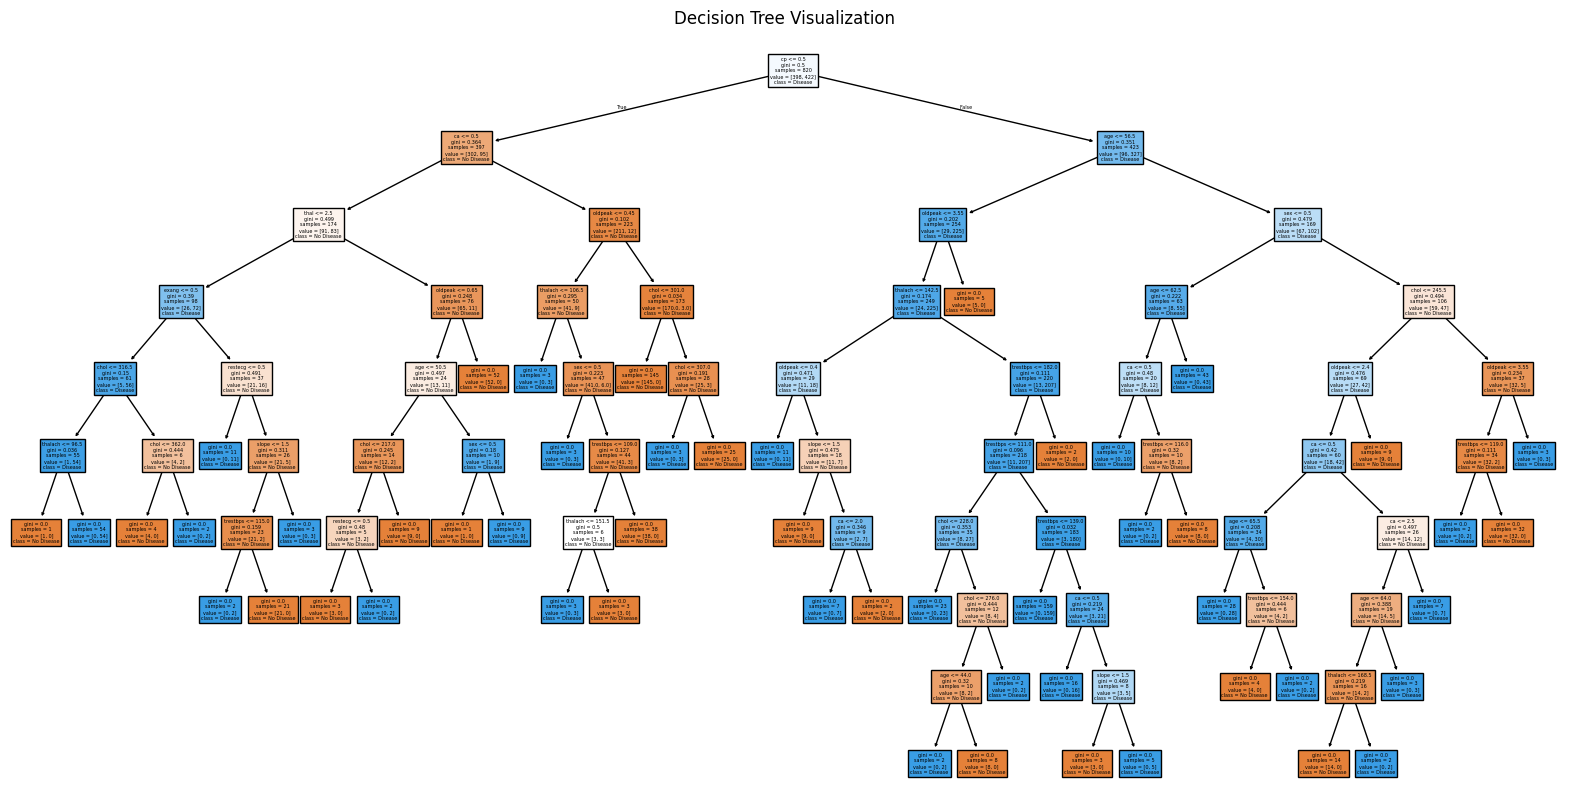

In [7]:
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Visualization")
plt.show()

Analyzing Overfitting by Tree Depth

In [8]:
train_acc = []
test_acc = []
depths = range(1, 21)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

Plotting train vs test accuracy

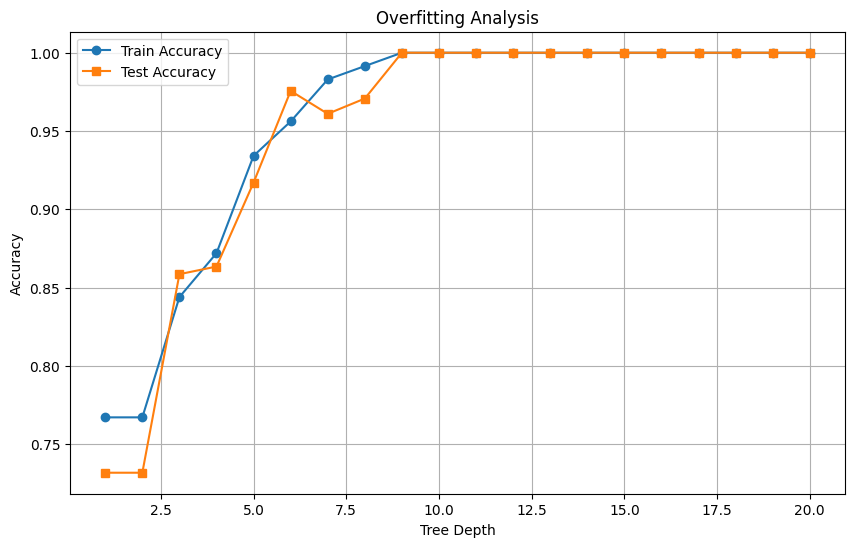

In [9]:
plt.figure(figsize=(10,6))
plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, test_acc, label='Test Accuracy', marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.show()

Training Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
classifier2.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Checking Accuracy for both the models

In [12]:
from sklearn.metrics import accuracy_score
dt_acc = accuracy_score(y_test, classifier.predict(X_test))
rf_acc = accuracy_score(y_test, classifier2.predict(X_test))

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Decision Tree Accuracy: 0.9854
Random Forest Accuracy: 1.0000


Feature Importance from Random Forest

In [13]:
importances = classifier2.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

Plotting Feature Importances

In [14]:
import seaborn as sns

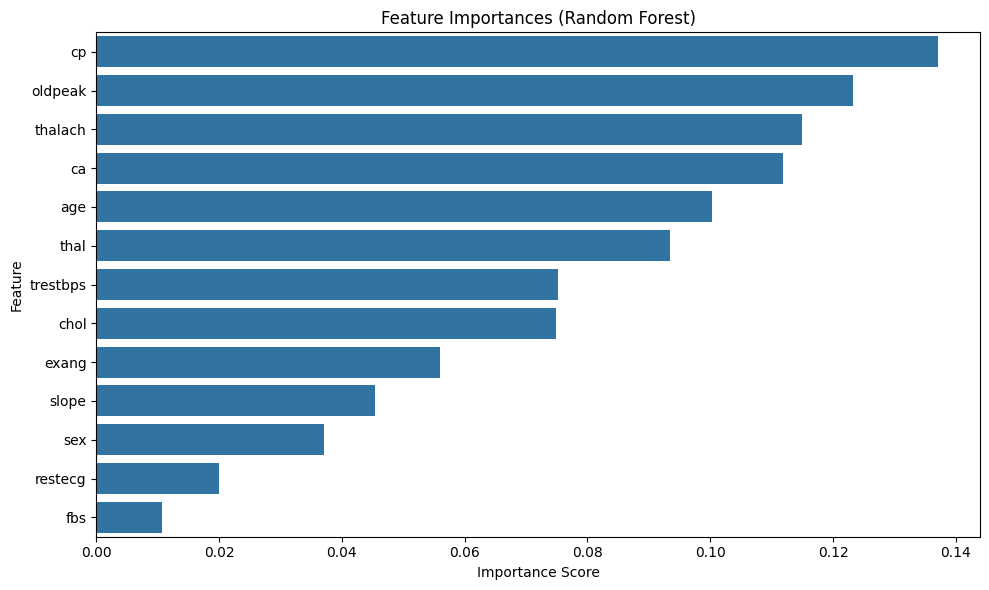

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Cross-Validation Evaluation

In [16]:
dt_cv = cross_val_score(classifier, X, y, cv=5)
rf_cv = cross_val_score(classifier2, X, y, cv=5)

print(f"Decision Tree CV Accuracy: {dt_cv.mean():.4f}")
print(f"Random Forest CV Accuracy: {rf_cv.mean():.4f}")

Decision Tree CV Accuracy: 0.9971
Random Forest CV Accuracy: 0.9971
